In [16]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten

In [6]:
(X_train,y_train),(X_test,y_test)=keras.datasets.mnist.load_data()

In [7]:
X_train.shape

(60000, 28, 28)

In [8]:
X_test.shape

(10000, 28, 28)

In [9]:
import matplotlib.pyplot as plt

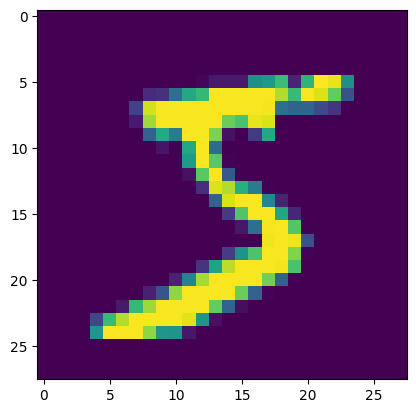

In [10]:
plt.imshow(X_train[0])

In [11]:
X_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [12]:
X_train=X_train/255
X_test=X_test/255

In [15]:
X_test[0].shape

(28, 28)

In [17]:
# Make a model
#we use flatten to change n-d array to 1-d array
model=Sequential()
model.add(Flatten(input_shape=X_train[0].shape))
model.add(Dense(128,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 32)                4128      
                                                                 
 dense_2 (Dense)             (None, 10)                330       
                                                                 
Total params: 104,938
Trainable params: 104,938
Non-trainable params: 0
_________________________________________________________________


In [19]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [20]:
history=model.fit(X_test,y_test,epochs=25,validation_split=0.2)

Epoch 1/25
250/250 [==============================] - 2s 6ms/step - loss: 0.6327 - accuracy: 0.8215 - val_loss: 0.2249 - val_accuracy: 0.9385
Epoch 2/25
250/250 [==============================] - 1s 5ms/step - loss: 0.2561 - accuracy: 0.9265 - val_loss: 0.1845 - val_accuracy: 0.9485
Epoch 3/25
250/250 [==============================] - 2s 8ms/step - loss: 0.1766 - accuracy: 0.9494 - val_loss: 0.1629 - val_accuracy: 0.9500
Epoch 4/25
250/250 [==============================] - 2s 6ms/step - loss: 0.1267 - accuracy: 0.9620 - val_loss: 0.1552 - val_accuracy: 0.9575
Epoch 5/25
250/250 [==============================] - 1s 5ms/step - loss: 0.0941 - accuracy: 0.9743 - val_loss: 0.1672 - val_accuracy: 0.9525
Epoch 6/25
250/250 [==============================] - 1s 5ms/step - loss: 0.0645 - accuracy: 0.9833 - val_loss: 0.1415 - val_accuracy: 0.9585
Epoch 7/25
250/250 [==============================] - 1s 5ms/step - loss: 0.0501 - accuracy: 0.9859 - val_loss: 0.1434 - val_accuracy: 0.9600
Epoch 

In [21]:
y_prob = model.predict(X_test)

313/313 [==============================] - 1s 4ms/step


In [22]:
#get the maximum index in each list 
y_pred=y_prob.argmax(axis=1)

In [23]:
y_pred

array([7, 2, 1, ..., 4, 5, 6])

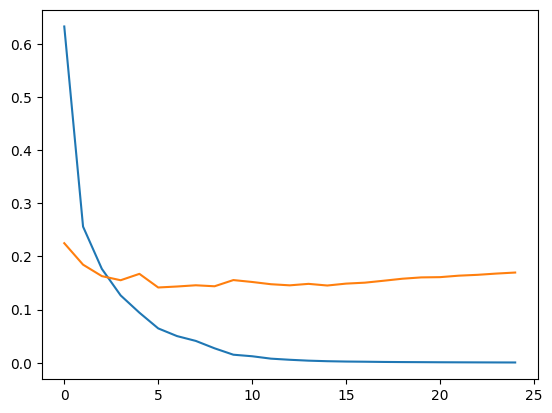

In [24]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

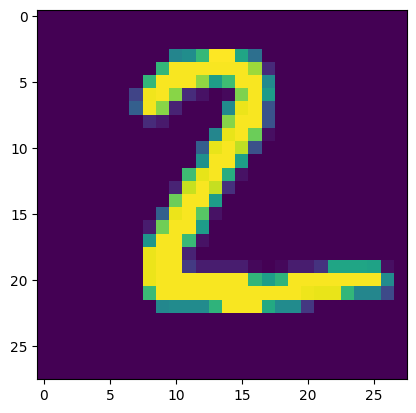

In [25]:
plt.imshow(X_test[1])

In [27]:
model.predict(X_test[1].reshape(1,28,28)).argmax(axis=1)

1/1 [==============================] - 0s 21ms/step


array([2])